<a href="https://colab.research.google.com/github/bangsudo/bangsudo.github.io/blob/master/capsule2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
import time
from multiprocessing import Pool
from functools import partial
import matplotlib.gridspec as gridspec

In [0]:
def quantum_cap_single(caps, pop=[20]*20, rate=0.015):
  replication = rate
  for i in range(caps):
      if pop[i] < 100:
        newpop=0
        for n in range(pop[i]):
          if random.uniform(0, 1) < replication:
            newpop=newpop+1
        pop[i]=pop[i]+newpop
        if pop[i] > 100:
          pop[i] = 100
  return(pop)

In [0]:
def plot_hurricane(nprocs=2,init_pop=10,days=100,samples=10,timing=False, rate=0.015,capsule_ave=95,fraction_full=0.95):
  #ignore nprocs for now
  start_time = time.time()
  p = Pool(nprocs)
  population = init_pop
  samples_per_proc = samples//nprocs
  x = []
  y = []
  ave_over_thresh = 0
  capsule_full_thresh = 0
  histogram = [0]*days
  pop=[init_pop]*samples
  for i in range(days):
    total_items=0
    newpop=[]
    x.extend([i]*samples)
    newpop = quantum_cap_single(samples, pop=pop, rate=rate)
    total_items=total_items+sum(newpop)
    y.extend(newpop)
    histogram[i]=total_items//samples
    if ave_over_thresh == 0:
      if histogram[i] >= 95:
        ave_over_thresh=i
    count = 0
    if capsule_full_thresh == 0:
      for j in newpop:
        if j >= capsule_ave:
          count=count+1
      if count >= fraction_full*samples:
        capsule_full_thresh = i
    pop=newpop
  
  stop_time = time.time()
  delta_time = stop_time - start_time
  if timing:
    print("seconds elapsed: " + str(delta_time))

  t = list(range(days))
  plt.rcParams["figure.figsize"] = (8,8)
  axs = [0]*2
  fig = plt.figure()
  gs1 = gridspec.GridSpec(2, 1)
  axs[0] = fig.add_subplot(gs1[0])
  axs[1] = fig.add_subplot(gs1[1])
  axs[0].plot(t, histogram)
  H = axs[1].hist2d(x,y, bins=[np.linspace(0,days,days),np.linspace(0,100,100)], norm=matplotlib.colors.LogNorm())
  axs[1].set_xlabel('days')
  axs[1].set_ylabel('items in quantum capsule')
  axs[0].set_ylabel('average items in capsule')
  axs[0].set_xlim([0,days])
  axs[0].get_xaxis().set_visible(False)
#  axs[0].axhline(y=95, xmin=0, xmax=days, color='red')
  axs[0].axvline(x=capsule_full_thresh, ymin=0, ymax=100, color='orange')
  axs[1].axvline(x=capsule_full_thresh, ymin=0, ymax=100, color='orange')
  axs[0].axvline(x=ave_over_thresh,     ymin=0, ymax=100, color='red'   )
  axs[1].axvline(x=ave_over_thresh,     ymin=0, ymax=100, color='red'   )
  fig.tight_layout()
  plt.show()

The top plot illustrates the average number of items in a capsule. The red line reprents when the average number of capsules reaches 95 items. The orange line represnts when 95% of the capsules are full. These default thresholds can be modified with the capsule_ave and fraction_full arguments passed to the function.

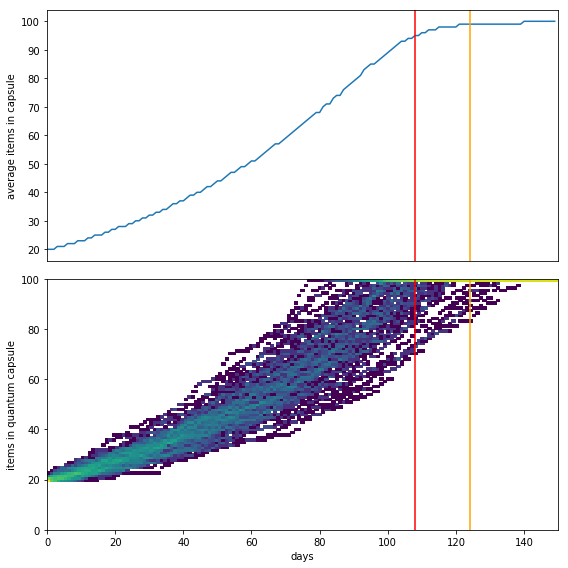

In [40]:
plot_hurricane(init_pop=20,days=150,samples=100,rate=0.015,capsule_ave=95,fraction_full=0.95)

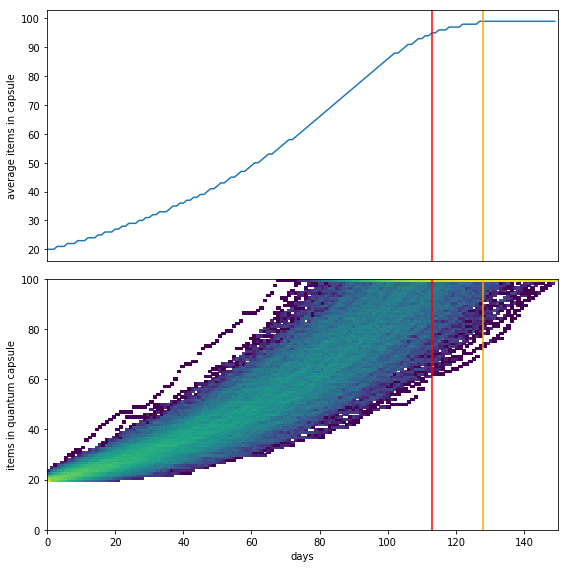

In [41]:
plot_hurricane(init_pop=20,days=150,samples=800,rate=0.015,capsule_ave=95,fraction_full=0.95)

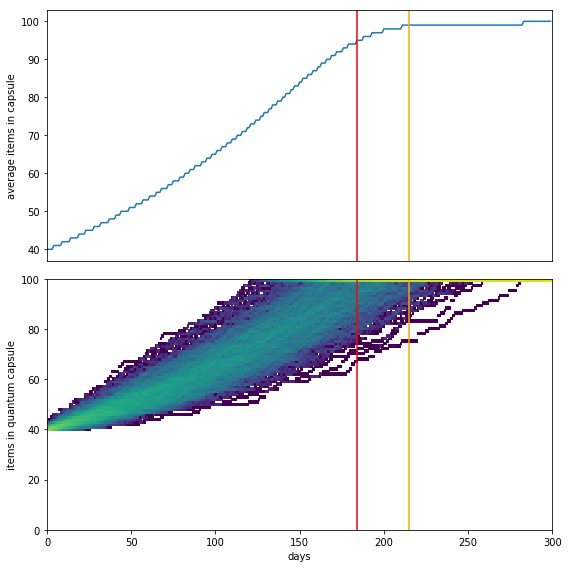

In [42]:
plot_hurricane(init_pop=40,days=300,samples=500,rate=0.005,capsule_ave=95,fraction_full=0.95)